<a href="https://colab.research.google.com/github/mcmathiesen/super-potato/blob/main/Assignment2Mathiesen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from sklearn.datasets import load_diabetes

In [6]:
diabetes = load_diabetes()

In [7]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [8]:
diabetes.data.shape

(442, 10)

In [9]:
diabetes.target.shape

(442,)

In [10]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
import pandas as pd

In [22]:
pd.set_option('precision', 2 )  #set precision to 2

In [14]:
diabetes_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [15]:
diabetes_df['MedianS6'] = pd.Series(diabetes.target)

In [16]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,MedianS6
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


In [23]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,MedianS6
count,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,442.00
mean,-3.63e-16,1.31e-16,-8.05e-16,1.28e-16,-8.84e-17,1.33e-16,-4.57e-16,3.78e-16,-3.83e-16,-3.41e-16,152.13
std,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,77.09
min,-1.07e-01,-4.46e-02,-9.03e-02,-1.12e-01,-1.27e-01,-1.16e-01,-1.02e-01,-7.64e-02,-1.26e-01,-1.38e-01,25.00
25%,-3.73e-02,-4.46e-02,-3.42e-02,-3.67e-02,-3.42e-02,-3.04e-02,-3.51e-02,-3.95e-02,-3.32e-02,-3.32e-02,87.00
50%,5.38e-03,-4.46e-02,-7.28e-03,-5.67e-03,-4.32e-03,-3.82e-03,-6.58e-03,-2.59e-03,-1.95e-03,-1.08e-03,140.50
75%,3.81e-02,5.07e-02,3.12e-02,3.56e-02,2.84e-02,2.98e-02,2.93e-02,3.43e-02,3.24e-02,2.79e-02,211.50
max,1.11e-01,5.07e-02,1.71e-01,1.32e-01,1.54e-01,1.99e-01,1.81e-01,1.85e-01,1.34e-01,1.36e-01,346.00


In [25]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

In [26]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns

In [28]:
sns.set_style('whitegrid')

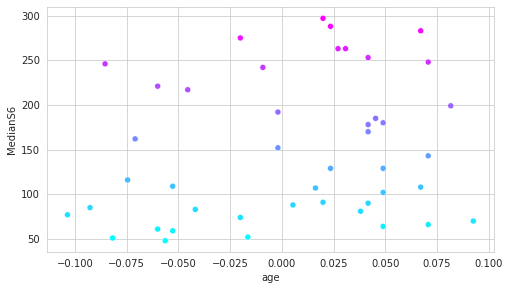

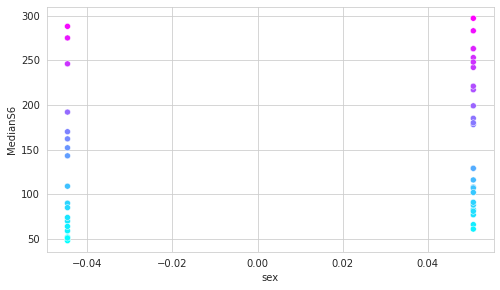

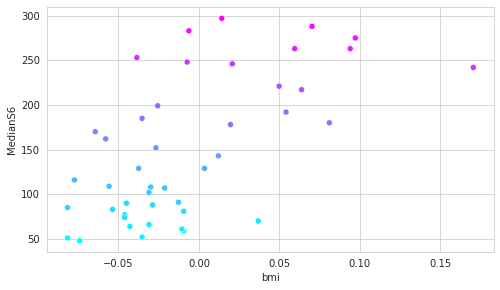

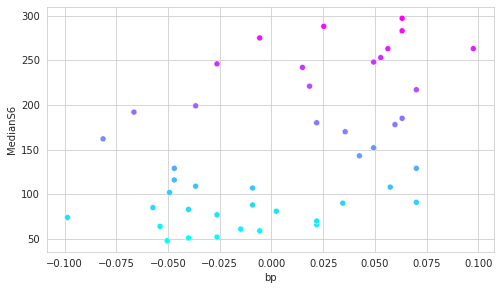

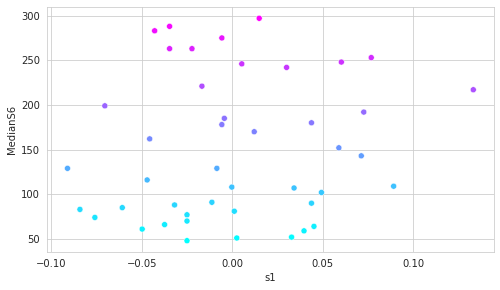

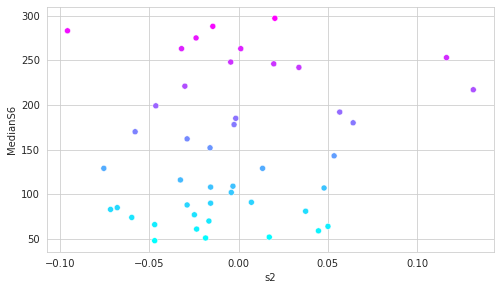

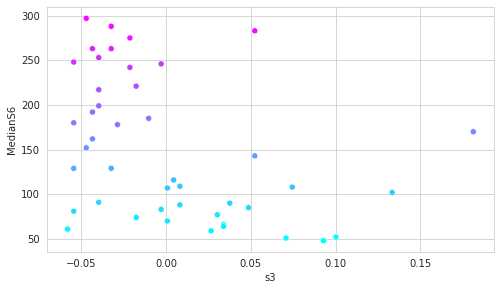

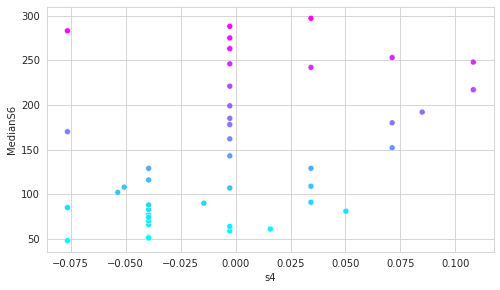

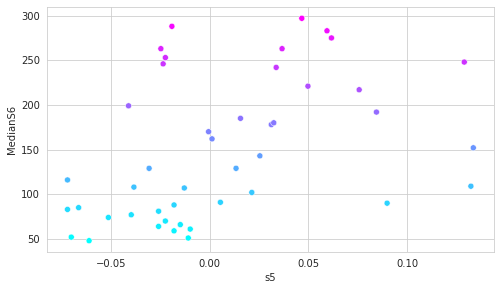

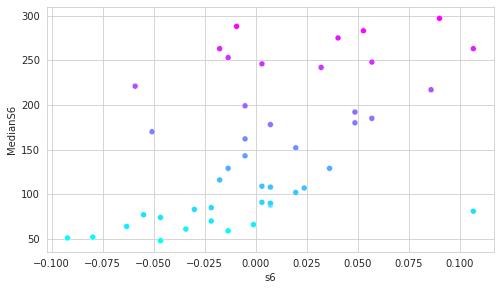

In [29]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_df, x=feature, 
                    y='MedianS6', hue='MedianS6', 
                    palette='cool', legend=False)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)

In [32]:
X_train.shape

(331, 10)

In [33]:
X_test.shape

(111, 10)

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
linear_regression = LinearRegression()

In [38]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
for i, name in enumerate(diabetes.feature_names):
  print(f'{name :>10}:{linear_regression.coef_[i]}')

       age:-60.221893331882335
       sex:-266.45890749037505
       bmi:523.0596748020042
        bp:310.51485159166873
        s1:-336.17030792547865
        s2:137.344544538294
        s3:-131.13560429688624
        s4:-1.1485501589064313
        s5:622.3374924905781
        s6:60.46751763603552


In [42]:
linear_regression.intercept_

152.22835839334243

In [43]:
predicted = linear_regression.predict(X_test)

In [45]:
expected = y_test

In [46]:
predicted[:5]

array([115.46727109,  83.46033257, 160.77912055, 187.65807631,
        72.72355267])

In [47]:
expected[:5]

array([ 79.,  55., 109., 178.,  39.])

In [51]:
df = pd.DataFrame()

In [52]:
df['Expected'] = pd.Series(expected)

In [53]:
df['Predicted'] = pd.Series(predicted)

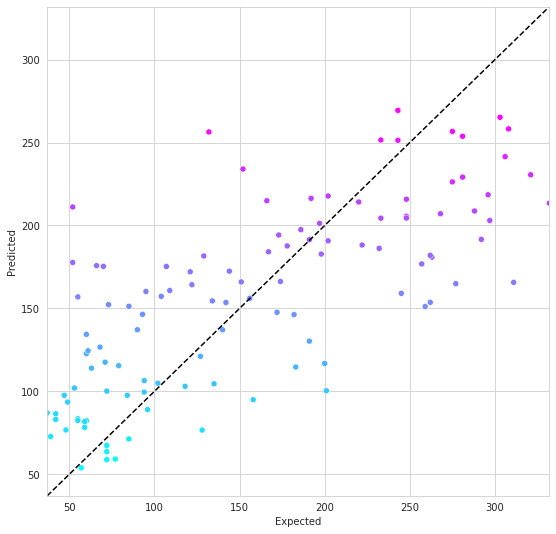

In [55]:
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data = df, x = 'Expected', y = 'Predicted', 
                       hue='Predicted', palette = 'cool', legend = False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')


In [56]:
from sklearn import metrics

In [57]:
metrics.r2_score(expected, predicted)

0.5322440129151977

In [58]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [60]:
estimators = {
    'LinearRegression' : linear_regression,
    'ElasticNet' : ElasticNet(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge()
}

In [61]:
from sklearn.model_selection import KFold, cross_val_score

In [65]:
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator = estimator_object,
                           X = diabetes.data, y = diabetes.target,
                           cv = kfold, scoring = 'r2')
  print(f'{estimator_name:>16}: ' +
        f'mean of R2 scores = {scores.mean():.3f}')

LinearRegression: mean of R2 scores = 0.475
      ElasticNet: mean of R2 scores = -0.002
           Lasso: mean of R2 scores = 0.339
           Ridge: mean of R2 scores = 0.421
